*Analytical Information Systems*

# Worksheet 4 - Data Visualization

Matthias Griebel<br>
Lehrstuhl für Wirtschaftsinformatik und Informationsmanagement

SS 2020

__Credits__

- John Burn-Murdoch, Financial Times http://johnburnmurdoch.github.io

- "R for Data Science" by Garrett Grolemund and Hadley Wickham
    - Chapter 3: [Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html)
    - Chapter 7: [Exploratory Data Analysis](https://r4ds.had.co.nz/exploratory-data-analysis.html)

# Exercises

## 1. Changing tides of european footballing power

Materials from John Burn-Murdoch, Financial Times 
http://johnburnmurdoch.github.io

The top-end quality, strength-in-depth and competitive balance of European football leagues have changed markedly over the last 15 years. We want to show:

1. Which countries have the best teams?

2. Which leagues are the most/least balanced?

3. What is the 'quality gap' between a given pair of leagues?

4. How does the nth best team in league x today compare to its predecessors?

5. How have all of the above changed over time?

In [22]:
library(tidyverse)

Load the data

In [2]:
allSeasons <- read.csv('https://raw.githubusercontent.com/johnburnmurdoch/johnburnmurdoch.github.io/master/slides/r-ggplot/changing-tides-of-football.csv', stringsAsFactors = F)

Get to know the data

In [3]:
allSeasons %>% glimpse()

Observations: 1,556
Variables: 12
$ club    <chr> "ManUnited", "Liverpool", "Leeds", "Arsenal", "Chelsea", "Ips…
$ score   <int> 1876, 1876, 1843, 1820, 1794, 1744, 1732, 1725, 1704, 1699, 1…
$ year    <int> 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2…
$ country <chr> "ENG", "ENG", "ENG", "ENG", "ENG", "ENG", "ENG", "ENG", "ENG"…
$ n       <int> 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2…
$ rank    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…
$ allRank <int> 6, 5, 11, 14, 18, 31, 34, 42, 46, 49, 55, 58, 61, 68, 70, 78,…
$ atb     <int> 2031, 2020, 1979, 1946, 1860, 1830, 1802, 1775, 1765, 1737, 1…
$ atw     <int> 1831, 1826, 1793, 1776, 1738, 1710, 1688, 1667, 1663, 1661, 1…
$ eb      <int> 1927, 1918, 1880, 1868, 1865, 1840, 1813, 1796, 1792, 1791, 1…
$ ew      <int> 1817, 1761, 1751, 1729, 1700, 1682, 1680, 1673, 1669, 1665, 1…
$ tenth   <int> 1858, 1858, 1858, 1858, 1858, 1858, 1858, 1858, 1858, 1858, 1…


1. Which countries have the best teams in 2016? 
    - filter your data
    - look at the `score` 

In [4]:
oneSeason <- allSeasons %>% filter(year==2016)

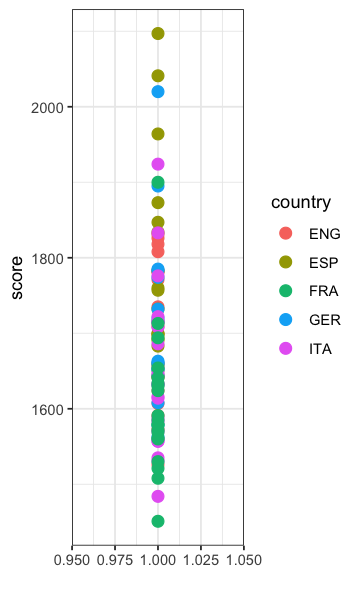

In [5]:
options(repr.plot.width=3, repr.plot.height=5)

oneSeason %>% 
    ggplot(aes(x=1,score,col=country)) +          
    geom_point(size=3) + 
    theme_bw() +
    theme(legend.position="right", legend.direction="vertical") +
    xlab('')

alternatively, with room to breathe:

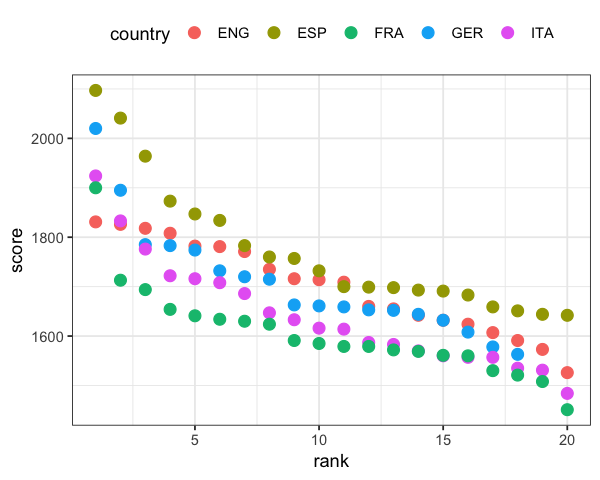

In [6]:
options(repr.plot.width=5, repr.plot.height=4)

oneSeason %>%
    ggplot(aes(rank,score,col=country)) + 
    geom_point(size=3) + 
    theme_bw() +
    theme(legend.position="top")

2. Which leagues are the most/least balanced in 2016?
    - combine `rank`and `score`

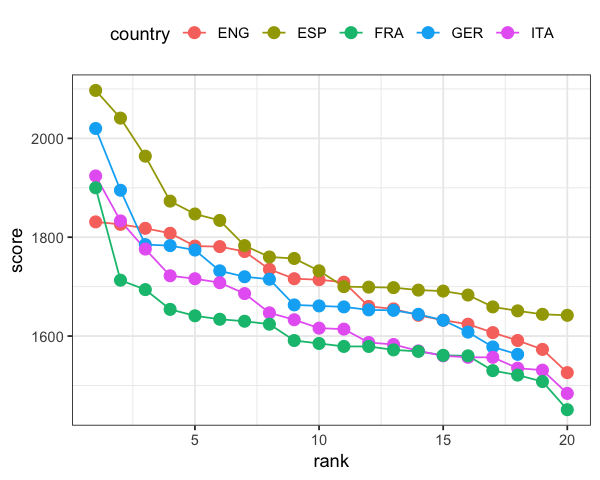

In [7]:
options(repr.plot.width=5, repr.plot.height=4)

oneSeason %>%
    ggplot(aes(rank,score,col=country)) +
    geom_path() + 
    geom_point(size=3) + 
    theme_bw() +
    theme(legend.position="top")

3. What is the 'quality gap' between a given pair of leagues in 2016?
    - Prepare a data set of two leagues ('countries')
    - Compare the scores of the teams at each rank    

In [8]:
# Prepare the data
allSeasons %>%
    filter(year==2016 & country %in% c('ENG','ESP')) %>%
    dplyr::select(score, rank, country) %>% 
    spread(., country, score) %>% 
    rowwise() %>%
    mutate(
    gap = ESP-ENG,
    max = max(ESP,ENG),
    min = min(ESP,ENG)) -> eng_esp

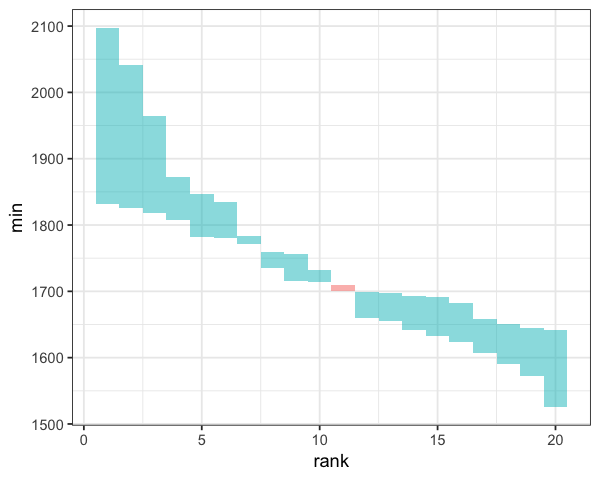

In [9]:
eng_esp %>%
    ggplot(aes(rank,min,fill=gap>0)) + 
    geom_rect(aes(xmin = rank-0.5, xmax=rank+0.5, ymin=min, ymax=max), alpha=0.5) +
    theme_bw() +
    theme(legend.position="none")

4. How does the nth best team in league x today compare to its predecessors in 2016?
    - Choose and filter one league

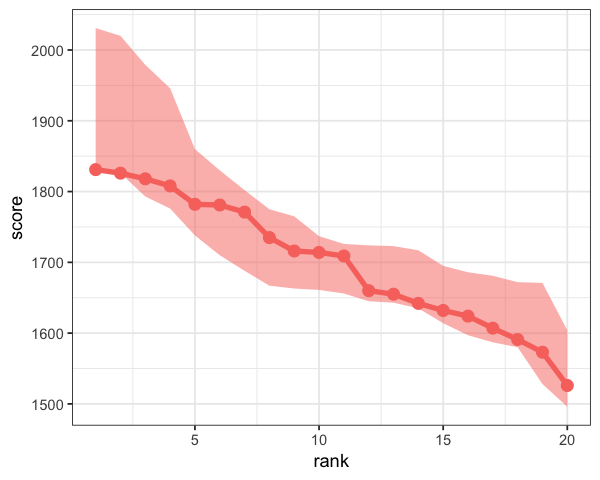

In [10]:
oneSeason %>% 
    filter(country == 'ENG') %>%
    ggplot(aes(rank,score,col=country)) + 
        geom_ribbon(aes(ymin = atw, ymax = atb, fill=country),col='transparent', alpha=0.5) +
        geom_path(alpha=1, size=1.5) + 
        geom_point(size=3) + 
        theme_bw() +
        theme(legend.position="none")

alternatively,

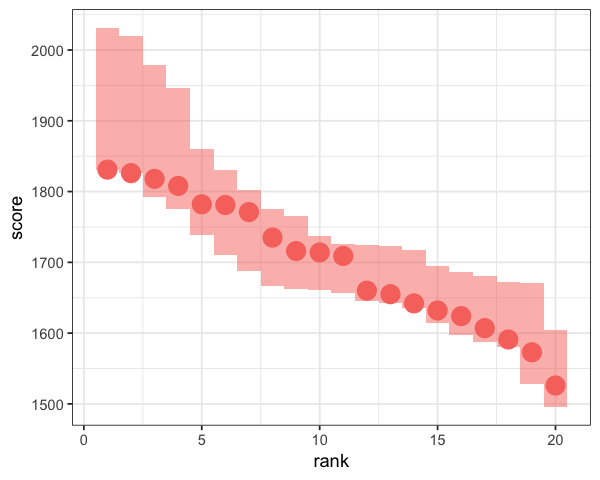

In [11]:
oneSeason %>% 
    filter(country == 'ENG') %>%
    ggplot(aes(rank,score,col=country, fill=country)) + 
      geom_rect(aes(xmin=rank-0.5, xmax=rank+0.5, ymin = atw, ymax = atb),col='transparent', alpha=0.5) +
      geom_point(size=5) + 
      theme_bw() +
      theme(legend.position="none")

alternatively,

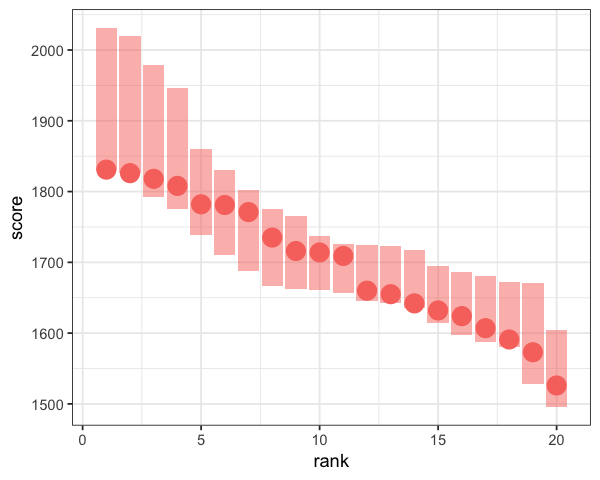

In [12]:
oneSeason %>% 
    filter(country == 'ENG') %>%
    ggplot(aes(rank,score,col=country, fill=country)) + 
      geom_rect(aes(xmin=rank-0.45, xmax=rank+0.45, ymin = atw, ymax = atb),col='transparent', alpha=0.5) +
      geom_point(size=5) + 
      theme_bw() +
      theme(legend.position="none")

5. How have all of the above changed over time? 
    - Balance of leagues
    - Use `facet_wrap`

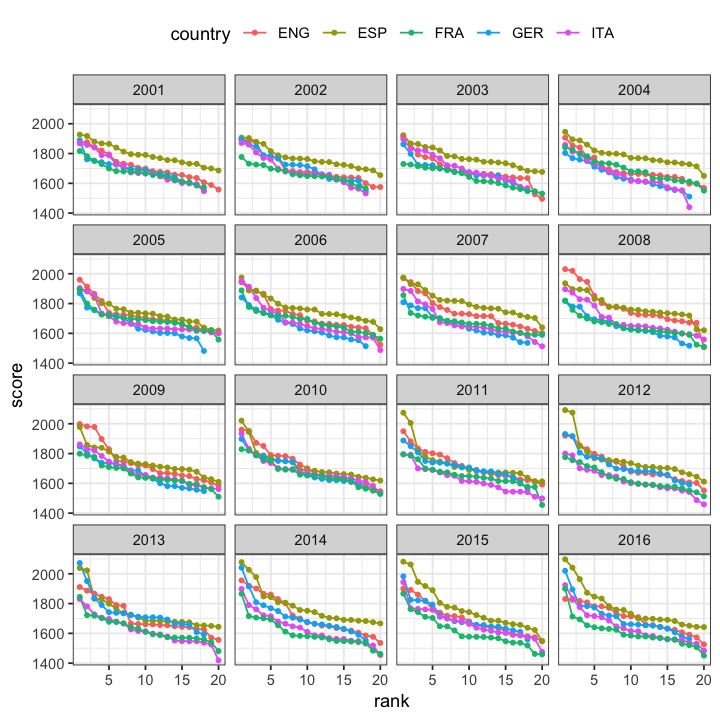

In [13]:
options(repr.plot.width=6, repr.plot.height=6)

allSeasons %>%
    ggplot(aes(rank,score,col=country)) + 
      geom_path() + 
      geom_point(size=1) + 
      facet_wrap(~year, ncol=4) + 
      theme_bw() +
      theme(legend.position="top")

5. How have all of the above changed over time? 
     - Quality gap between a pair of leagues

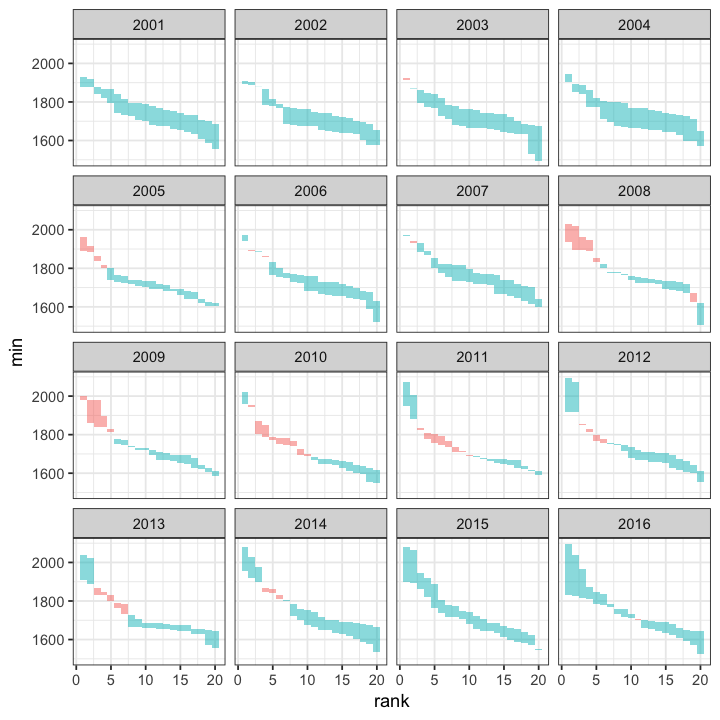

In [14]:
allSeasons %>%
    filter(country %in% c('ENG','ESP')) %>%
    select(score, year, rank, country) %>% 
    spread(., country, score) %>% 
    rowwise() %>%
    mutate(
    gap = ESP-ENG,
    max = max(ESP,ENG),
    min = min(ESP,ENG)
    ) %>%
    ggplot(aes(rank,min,fill=gap>0)) + 
        geom_rect(aes(xmin = rank-0.5, xmax=rank+0.5, ymin=min, ymax=max), alpha=0.5) +
        facet_wrap(~year, ncol=4) + 
        theme_bw() +
        theme(legend.position="none")

## 2. Exam Questions

### 2.1 Exam AIS WS 2018/19
__Question 2: Descriptive Analytics__

(b) (3 Points) __Color palettes__: In the lecture we discussed that color palettes should reflect the underlying data types. Recommend a suitable palette choice for the following data sets:

i. (1 points) Daily stock performance measured as percent change

> Diverging

ii. (1 points) Annual sales data of a single company

> Sequential

iii. (1 points) Monthly earnings data of a single company

> Diverging

iv. (1 points) Distinguishing different companies in stock price charts

> Qualitative

v. (1 points) Points in AIS exam achieved by students ranging from 0 to 60

> Sequential

vi. (1 points) Coloring countries on a map based on the population's favorite sport

> Qualitative

### 2.2 Exam SS 2018
__Question 2: Descriptive Analytics__

(a) (4 points) __Plots and Colors__ In the lecture, you learned about different types of visualizations. Additionally, we talked about color palettes. Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|}
    \hline
    Fund ID & Performance \\
    \hline
    1         & $+7.03\%$        \\
    2         & $+3.14\%$         \\
    3         & $-1.12\%$         \\
    4         & $-5.87\%$          \\
    \dots       & \dots        \\
    \hline
\end{array}
<center>
(a) Asset Management
<center>

Solution: 
> - Plot: Show distribution via column histogram (x=FundID, y=Performance)
> - Color palette: diverging (negative vs. positive performance) or
> - Alternatively: qualitative (FundID)

Plotting the solution using ggplot2 (___not___ in exam) - Option 1

In [15]:
asset_performance <- tribble(
  ~FundID, ~Performance,
  "1",     7.03,
  "2",     3.14,
  "3",     -1.12,
  "4",     -2.84)

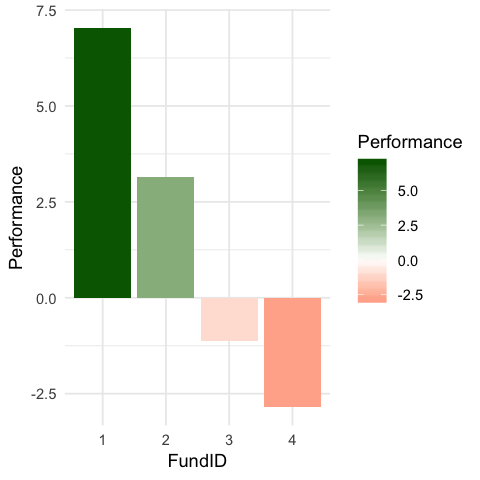

In [16]:
options(repr.plot.width=4, repr.plot.height=4)

asset_performance %>%
    ggplot() +
    geom_bar(mapping = aes(x=FundID, y=Performance,  fill=Performance), stat='identity') +
    scale_fill_gradient2(low='red', high='darkgreen', mid = 'white', midpoint = 0) + 
    theme_minimal()

Plotting the solution using ggplot2 (___not___ in exam) - Option 2

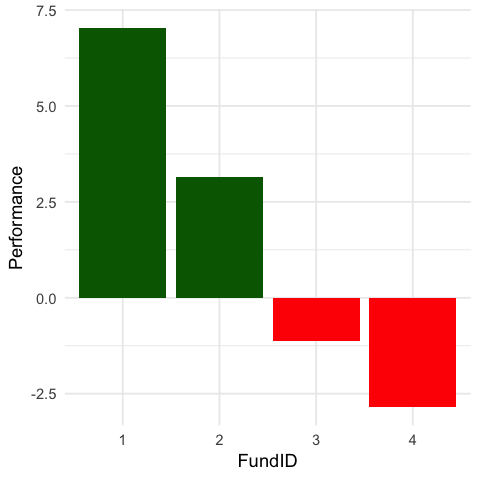

In [145]:
asset_performance %>%
    mutate(Color = if_else(Performance >= 0, "darkgreen", "red")) %>%
    ggplot() +
    geom_bar(mapping = aes(x=FundID, y=Performance,  fill=Color), stat='identity') +
    scale_fill_identity() + #use data values as visual ones
    theme_minimal()

[...] Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|l|}
    \hline
    Employee ID & Gender & Income\\
    \hline
    1       & male      &    80,000 \\
    2       & female    &   70,000 \\
    3       & male      &   35,000 \\
    4       & female    &   37,000 \\
    \dots   & \dots           & \dots \\
    \hline
\end{array}

<center>
(b) Gender Pay Gap
<center>

Soltion 1: 
> - Plot: for comparison, e.g. boxplot (x=Gender, y=Income)
> - Color palette: qualitative (Gender)

_Do we really need colors here?_

Generating sample data (___not___ in exam)

In [17]:
n=5000
tibble(EmployeeID = 1:n,
       Gender = sample(c("male","female"), size = n, replace = T)) %>%
       mutate(Income = if_else(Gender=="female", 
                            rnorm(n = n, mean = 40000, sd = 5000),
                            rnorm(n = n, mean = 45000, sd = 10000))) -> gender
gender %>% head()

EmployeeID,Gender,Income
1,female,39464.12
2,female,45149.90
3,female,37030.50
4,female,39756.48
5,male,61090.82
6,male,36161.22


Plotting the solution using ggplot2 (___not___ in exam)

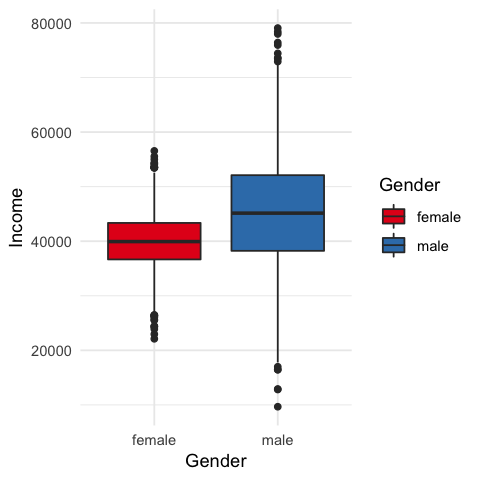

In [18]:
gender %>%
    ggplot() + 
    geom_boxplot(aes(x=Gender, y=Income, fill=Gender)) + 
    scale_fill_brewer(palette = 'Set1') +
    theme_minimal()

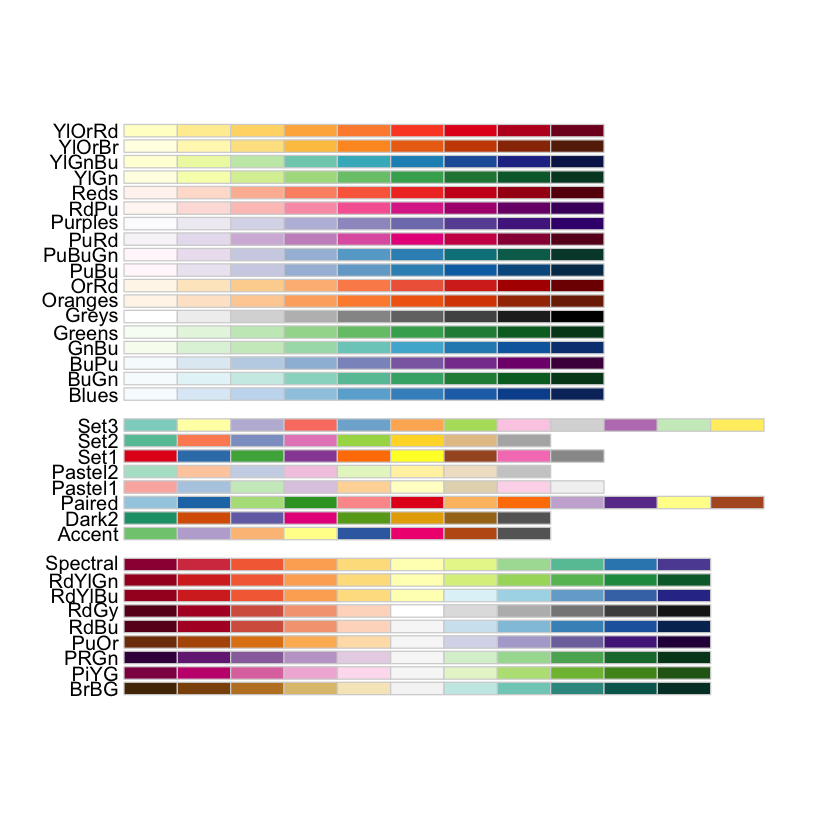

In [19]:
options(repr.plot.width=7, repr.plot.height=7)
RColorBrewer::display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE, colorblindFriendly=FALSE)

Solution 2: 

> - Plot: for comparison, e.g. bar chart (x=Income Bins, y=Income)
> - Color palette: qualitative (Gender)

Plotting the solution using ggplot2 (___not___ in exam) - Option 1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


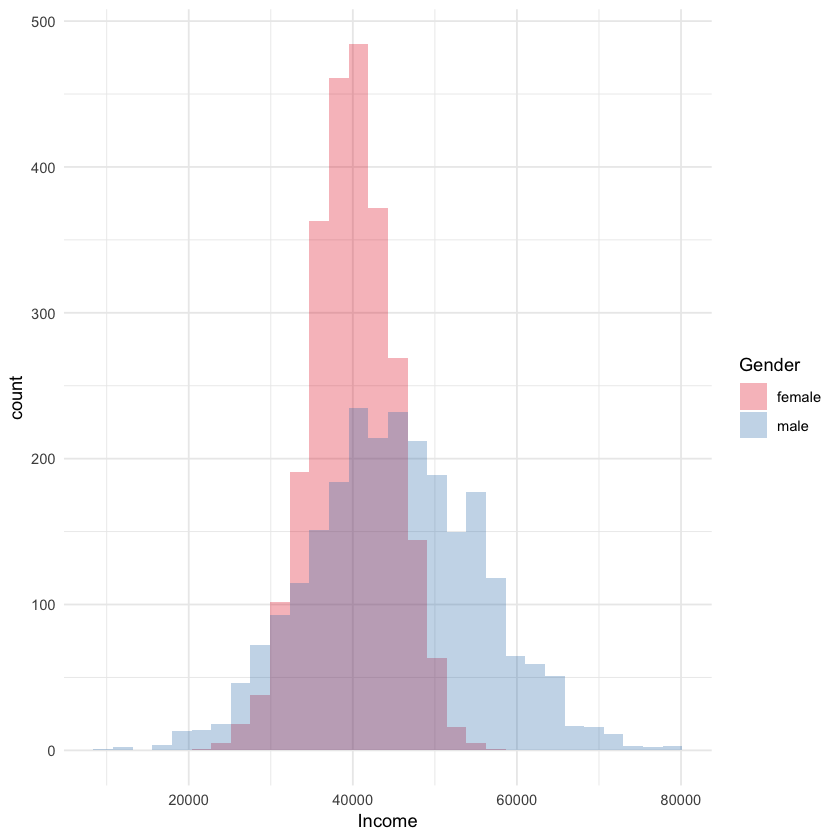

In [20]:
gender %>%
    ggplot() + 
    geom_histogram(aes(x=Income, fill=Gender), position = "identity", alpha=0.3) + 
    scale_fill_brewer(palette = 'Set1') +
    theme_minimal()

Plotting the solution using ggplot2 (___not___ in exam) - Option 2

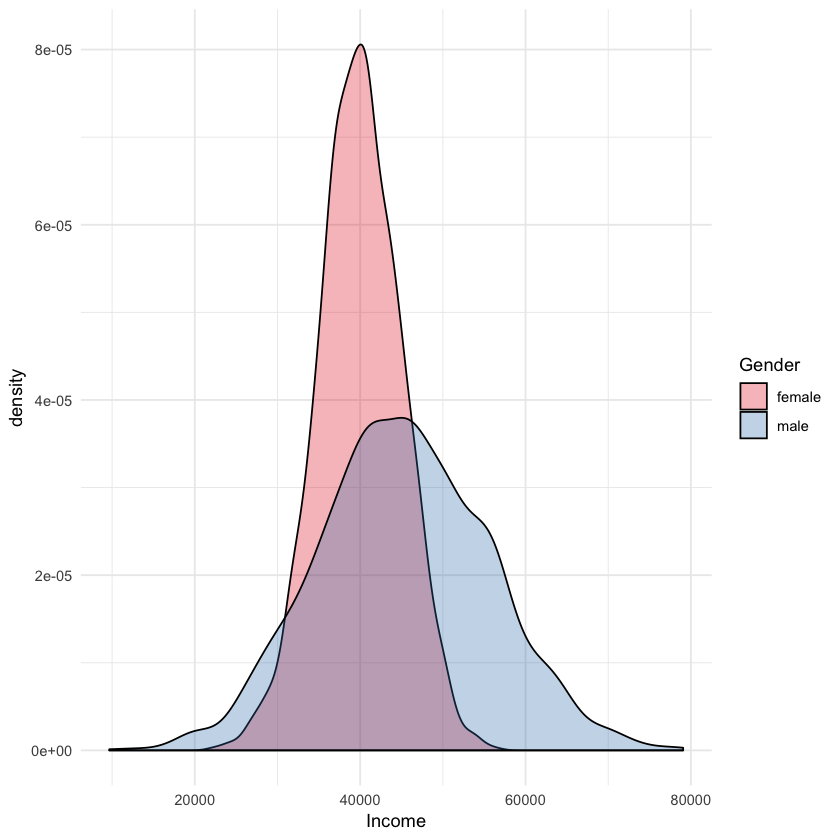

In [21]:
gender %>%
    ggplot() + 
    geom_density(aes(x=Income, fill=Gender), position = "identity", alpha=0.3) + 
    scale_fill_brewer(palette = 'Set1') +
    theme_minimal()